# -----------------------                       EDA             ---------------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../data/raw/home_credit/HC_application_train.csv")

In [3]:
df.shape

(307511, 122)

In [4]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
df.isna().sum().sum()

np.int64(9152465)

In [9]:
missing = df.isna().mean() * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing.head(20)


COMMONAREA_MEDI             69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_AVG              69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_MEDI              67.848630
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_MEDI            66.497784
YEARS_BUILD_AVG             66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_AVG                59.376738
LANDAREA_MEDI               59.376738
LANDAREA_MODE               59.376738
dtype: float64

-  identifying cols with high missing percentage

In [10]:
missing = df.isna().mean() * 100

missing_cols=missing[missing>60].index.tolist()
missing_cols

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE']

## - Numerical features: distributions ,outliers
( plot  histograms for numerical cols to understand scale/skew)

array([[<Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>,
        <Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>,
        <Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_EMPLOYED'}>,
        <Axes: title={'center': 'DAYS_REGISTRATION'}>],
       [<Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'FLAG_EMP_PHONE'}>,
        <Axes: title={'center': 'FLAG_WORK_PHONE'}>,
        <Axes: title={'center': 'FLAG_CONT_MOBILE'}>,
        <Axes: title={'center': 'FLAG_PHONE'}>,
        <Axes: title={'center': 'FLAG_EMAIL'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>,
        <Axes: title={'center': 'REGION_RATING_CLIENT'}>,
        <Axes: title={'center': 'REGION_RATING_CLIENT_W_CITY'}>],
       [<Axes: title={'center': 'HOUR_APPR_PROCESS_

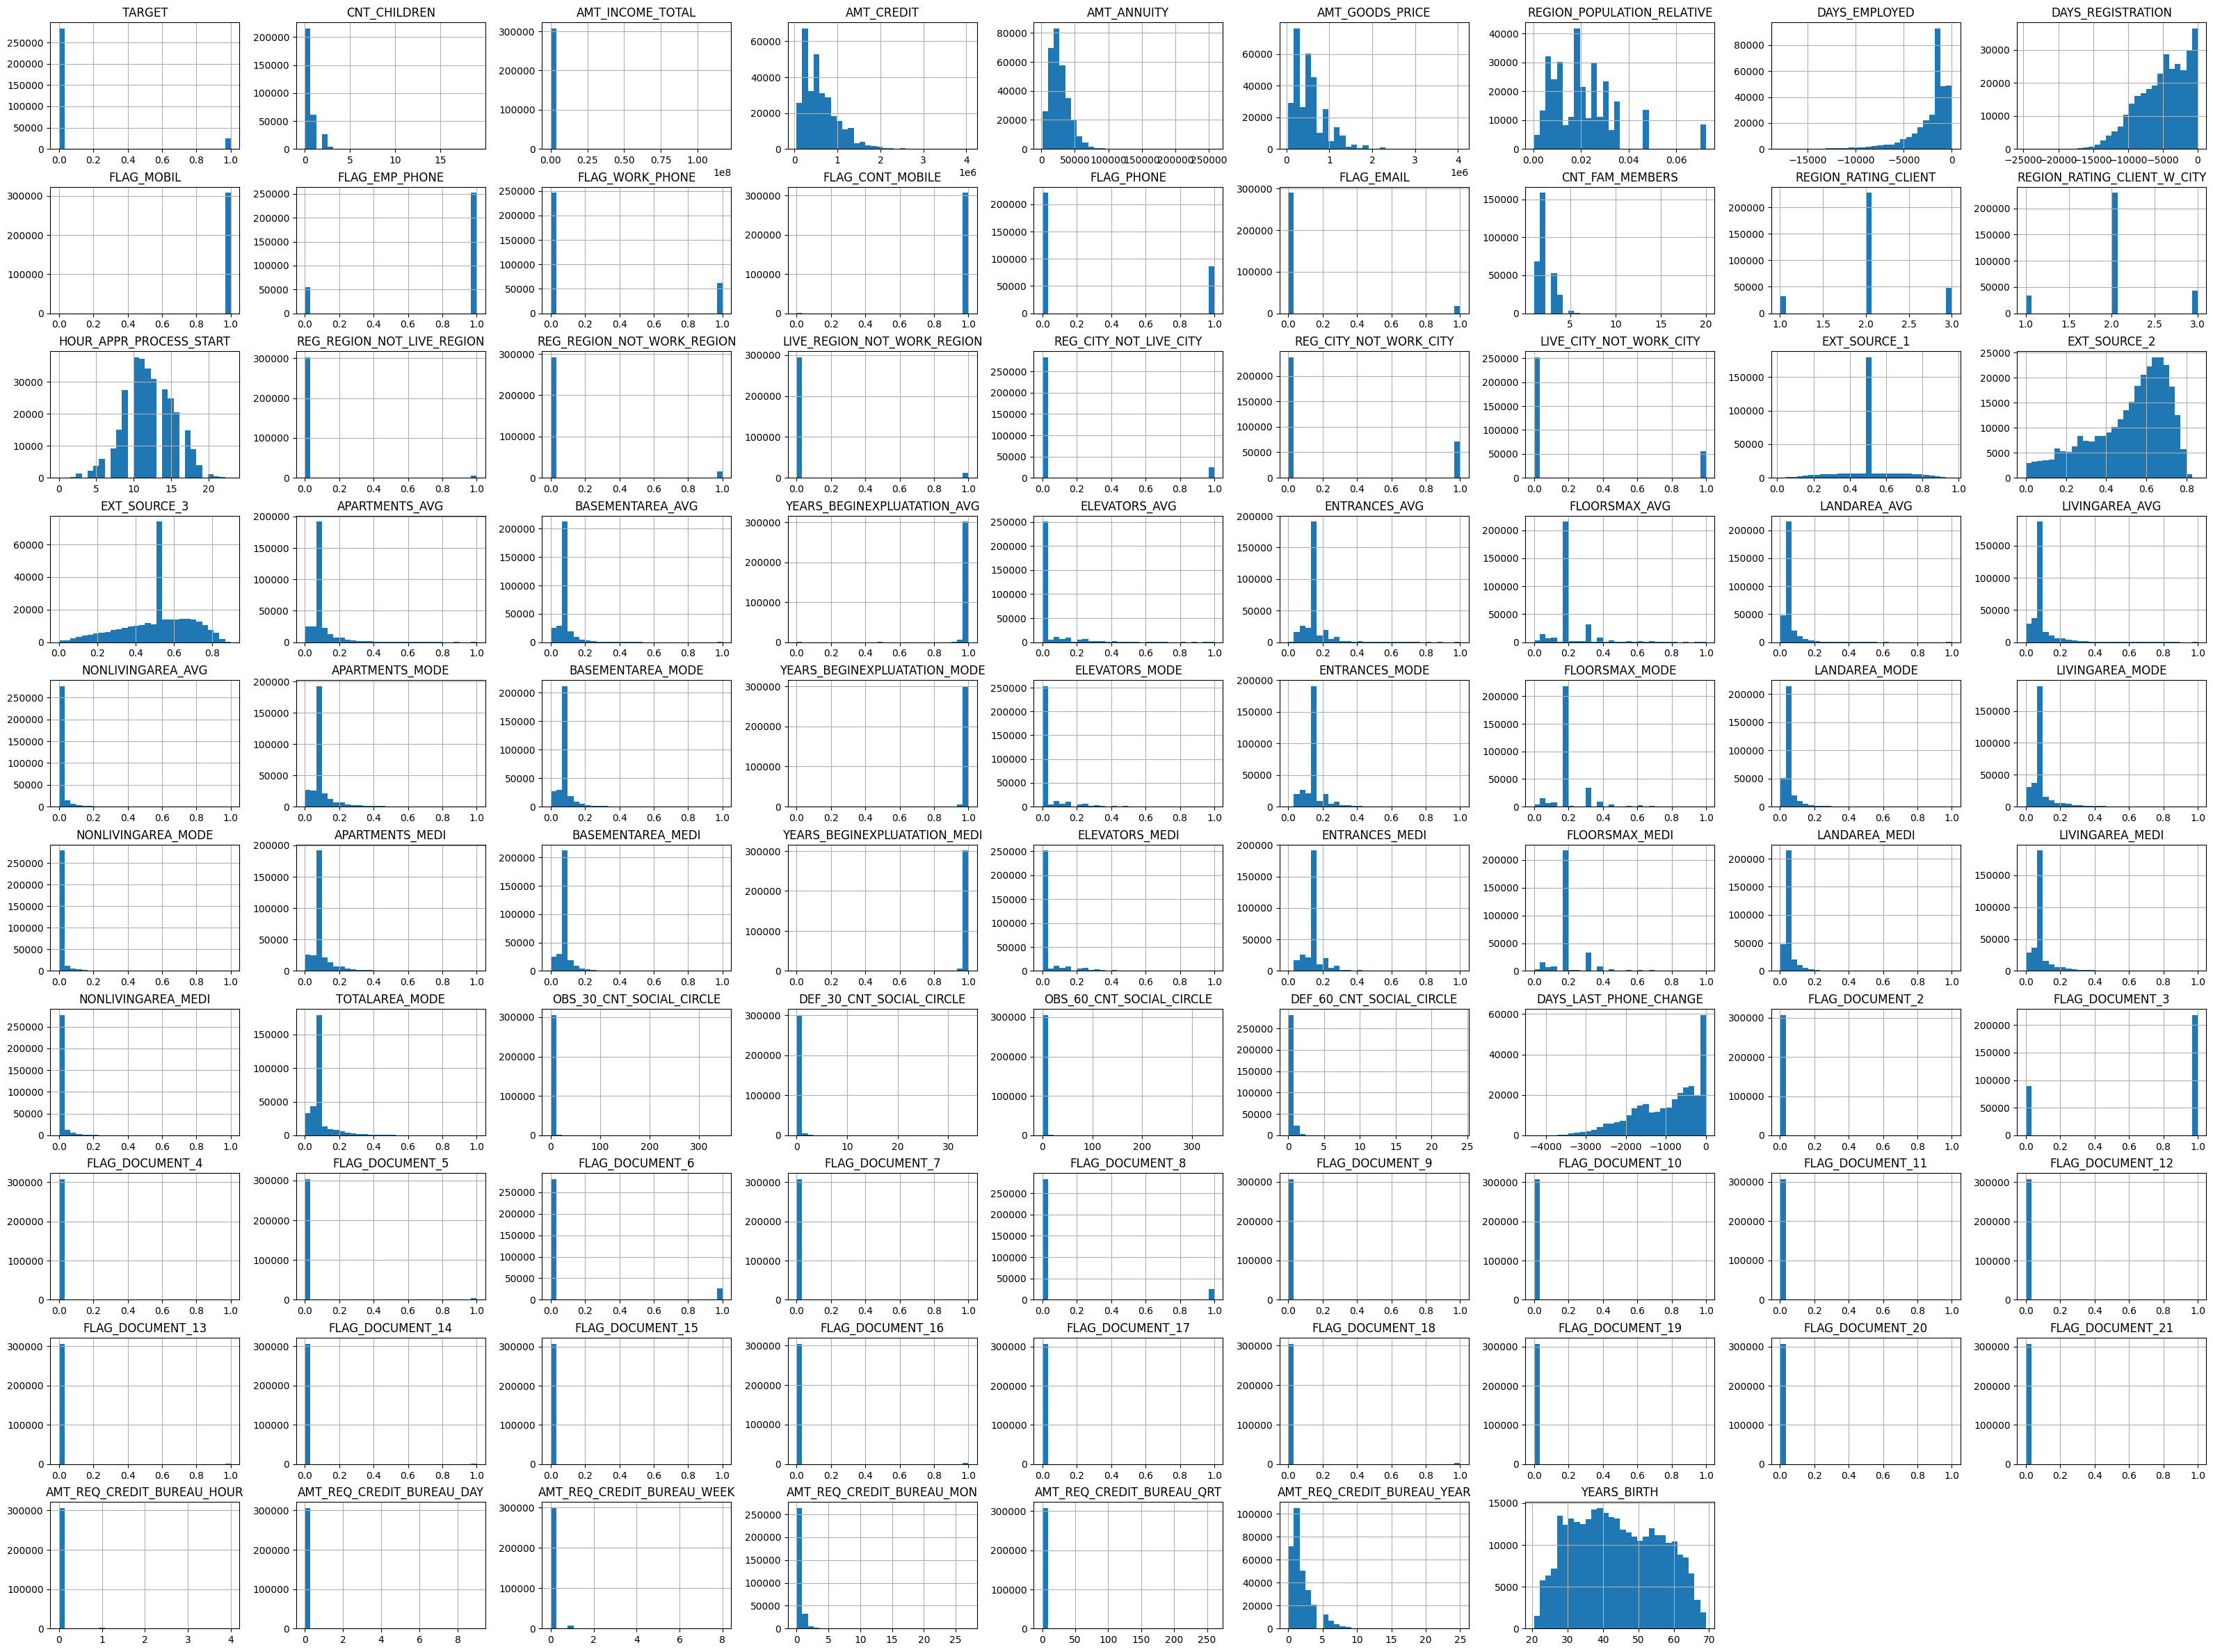

In [39]:
num_cols=df.select_dtypes(include=["int64","Float64"]).columns
#df[num_cols].hist()
df[num_cols].hist(figsize=(40,30), bins=30)

- identifying columns with only unique value

In [11]:
#constant_cols=[c for c in df.columns if df[c].unique()==1]  =>ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()  , because df[c].unique() returns array
constant_cols = [c for c in df.columns if df[c].nunique() == 1]
print(f'found {len(constant_cols)} constant_columns')
constant_cols
 

found 0 constant_columns


[]

In [12]:
# identifying  id cols
id_cols = [c for c in df.columns if 'SK_ID' in c or 'ID' in c]

In [13]:
drop_cols = set(missing_cols + constant_cols + id_cols)
drop_cols

{'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_ID_PUBLISH',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MODE',
 'OWN_CAR_AGE',
 'SK_ID_CURR',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE'}

In [14]:
df = df.drop(columns=drop_cols)
print(df.shape)


(307511, 103)


In [15]:
df.shape

(307511, 103)

 - i am left with 103  feature , still too much . this doesn't really matter because i plan to use XGBoost and LightGBM , who can handle a lot  of features . However! , i'll do feature importance or  correlation 

# - missing values analysis

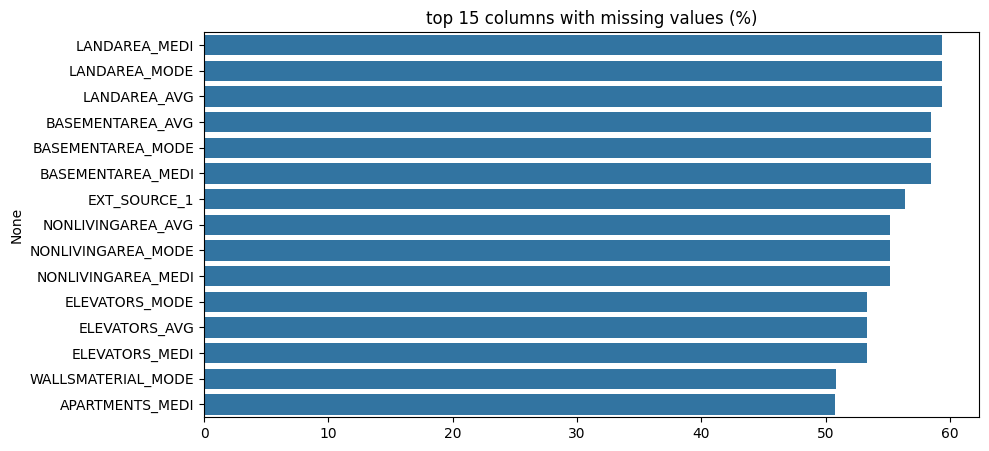

In [16]:
missing=df.isna().mean().sort_values(ascending=False)
missing[missing>0].head(20)

plt.figure(figsize=(10,5))
sns.barplot(x=missing[missing>0][:15].values*100, y=missing[missing>0][:15].index)
plt.title('top 15 columns with missing values (%)')
plt.show()

## A: missing numerical features (float, int)

In [37]:
num_cols=df.select_dtypes(include=["int64","float64"]).columns
df[num_cols]=df[num_cols].fillna(df[num_cols].median())

## B: missing categorical features (objects)

In [ ]:
cat_col=df.select_dtypes(include=["object"]).columns
if len(cat_col)!=0:# added this because if  there are no ones it might cause a problem, but originally it worked 
    df[cat_col]=df[cat_col].fillna(df[cat_col].mode().iloc[0])

## C: special columns that look numeric but behave differently

In [35]:
df["DAYS_EMPLOYED"].replace(365243, np.nan)

0         -637.0
1        -1188.0
2         -225.0
3        -3039.0
4        -3038.0
           ...  
307506    -236.0
307507       NaN
307508   -7921.0
307509   -4786.0
307510   -1262.0
Name: DAYS_EMPLOYED, Length: 307511, dtype: float64

In [36]:
df["YEARS_BIRTH"]=df['DAYS_BIRTH'] /-365
df=df.drop(columns=["DAYS_BIRTH"])

## -  target distribution 

In [17]:
df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

=>  NOT BALANCED

In [41]:
df.to_csv("../data/processed/cleaned_application.csv", index=False)
print("Saved cleaned file.")


Saved cleaned file.
